In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv('csv/prelim_datasets/gameandgrade.csv')

In [4]:
df.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.50
1,1,1,1,3,1,1,1,3,3,83.00
2,0,1,0,0,0,0,1,3,3,80.00
3,0,1,3,5,1,1,2,2,3,45.00
4,1,1,1,1,2,1,1,3,4,85.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sex               770 non-null    int64 
 1   School Code       770 non-null    int64 
 2   Playing Years     770 non-null    int64 
 3   Playing Often     770 non-null    int64 
 4   Playing Hours     770 non-null    int64 
 5   Playing Games     770 non-null    int64 
 6   Parent Revenue    770 non-null    int64 
 7   Father Education  770 non-null    int64 
 8   Mother Education  770 non-null    int64 
 9   Grade             770 non-null    object
dtypes: int64(9), object(1)
memory usage: 60.3+ KB


In [6]:
# Convert Grade to numeric
df['Grade'] = pd.to_numeric(df['Grade'], errors='coerce')

In [7]:
print(df.isnull().sum())

Sex                 0
School Code         0
Playing Years       0
Playing Often       0
Playing Hours       0
Playing Games       0
Parent Revenue      0
Father Education    0
Mother Education    0
Grade               1
dtype: int64


In [8]:
print(df[df['Grade'].isna()])

     Sex  School Code  Playing Years  Playing Often  Playing Hours  \
363    0            4              0              0              0   

     Playing Games  Parent Revenue  Father Education  Mother Education  Grade  
363              0               2                 4                 4    NaN  


In [9]:
df = df.assign(Grade=df['Grade'].fillna(df['Grade'].mean()))

In [10]:
print(df.isnull().sum())

Sex                 0
School Code         0
Playing Years       0
Playing Often       0
Playing Hours       0
Playing Games       0
Parent Revenue      0
Father Education    0
Mother Education    0
Grade               0
dtype: int64


In [11]:
df = df.dropna(subset=["Grade", "Playing Hours"])

In [12]:
X = df[["Playing Hours"]]  # Predictor
y = df["Grade"]  # Target variable

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

Slope (Coefficient): -1.681359006640277
Intercept: 79.98545879711482


In [16]:
y_pred = model.predict(X_test)

In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 14.62411101569012
Mean Squared Error (MSE): 293.4270511383648
R² Score: 0.04384020455570248


C:\Users\Faith Nina Marie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Faith Nina Marie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Faith Nina Marie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Faith Nina Marie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498:

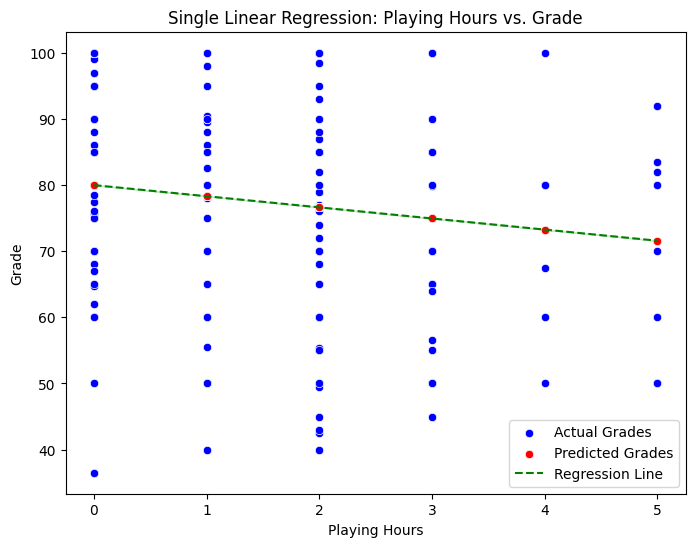

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test["Playing Hours"], y=y_test, label="Actual Grades", color="blue")
sns.scatterplot(x=X_test["Playing Hours"], y=y_pred, label="Predicted Grades", color="red")
sns.lineplot(x=X_test["Playing Hours"], y=y_pred, label="Regression Line", color="green", linestyle="--")
plt.xlabel("Playing Hours")
plt.ylabel("Grade")
plt.title("Single Linear Regression: Playing Hours vs. Grade")
plt.legend()
plt.show()

In [ ]:
# Conclusion: "Playing Hours" is a weak predictor of "Grade." 
# This means that other factors might influence a student's grade more than the number of hours they play games.